<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Lampiran_2_Fraud_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lampiran 1 - Fraud Scoring

In [2]:
# L1.1 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Fraud_Scoring_Dataset.xlsx')

In [3]:
# L1.2 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,Fraud,API_Fraud_Vendor_D,API_Fraud_Vendor_C,Application_Duration,Device_Type,Device_Apps_Installed,Device_Active_Since,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type,GPS_di_rumah_kantor
0,DEF0001,0,102,384,4.10-20 menit,Android,6,2_1_ke_3_tahun,Telco_A,1_Kurang_1_bulan,Public_Domain: Common,1
1,DEF0002,0,84,172,3.5-10 menit,IOS,9,3_Lebih_3_tahun,Telco_A,1_Kurang_1_bulan,Public_Domain: Common,1
2,DEF0003,0,286,194,5.20 menit lebih,Android,36,3_Lebih_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1
3,DEF0004,0,36,318,3.5-10 menit,Android,14,3_Lebih_3_tahun,Telco_E,4_2_ke_5_tahun,Professional_Domain,1
4,DEF0005,0,162,126,2.3-5 menit,Android,10,3_Lebih_3_tahun,Telco_D,1_Kurang_1_bulan,Public_Domain: Common,1
5,DEF0006,0,198,400,2.3-5 menit,Android,5,3_Lebih_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1
6,DEF0007,0,111,344,4.10-20 menit,Android,37,3_Lebih_3_tahun,Telco_C,5_Lebih_5_tahun,Public_Domain: Common,0
7,DEF0008,0,36,372,4.10-20 menit,Android,35,3_Lebih_3_tahun,Telco_E,5_Lebih_5_tahun,Public_Domain: Common,1
8,DEF0009,0,15,470,2.3-5 menit,IOS,17,2_1_ke_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1
9,DEF0010,0,85,570,4.10-20 menit,Android,17,2_1_ke_3_tahun,Telco_C,4_2_ke_5_tahun,Public_Domain: Common,0


In [4]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   Fraud                       1000 non-null   int64 
 2   API_Fraud_Vendor_D          1000 non-null   int64 
 3   API_Fraud_Vendor_C          1000 non-null   int64 
 4   Application_Duration        1000 non-null   object
 5   Device_Type                 1000 non-null   object
 6   Device_Apps_Installed       1000 non-null   int64 
 7   Device_Active_Since         1000 non-null   object
 8   Mobile_Provider             1000 non-null   object
 9   Mobile_Number_Active_Since  1000 non-null   object
 10  Email_Domain_Type           1000 non-null   object
 11  GPS_di_rumah_kantor         1000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


In [5]:
# Untuk melihat frekuensi dari variabel Fraud
print(df['Fraud'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel Fraud
print(df['Fraud'].value_counts(normalize=True) * 100)

0    950
1     50
Name: Fraud, dtype: int64
0    95.0
1     5.0
Name: Fraud, dtype: float64


In [6]:
# L1.3 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Application_Duration'] = df.Application_Duration.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')
df['GPS_di_rumah_kantor'] = df.GPS_di_rumah_kantor.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan integer untuk angka bulat
df['API_Fraud_Vendor_D'] = df.API_Fraud_Vendor_D.astype('int64')
df['API_Fraud_Vendor_C'] = df.API_Fraud_Vendor_C.astype('int64')
df['GPS_di_rumah_kantor'] = df.GPS_di_rumah_kantor.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')
df['Fraud'] = df.Fraud.astype('int64')

# Unsupervised Model

In [29]:
df_cluster = df[['Device_Type','Application_Duration','Device_Active_Since','Mobile_Provider','Mobile_Number_Active_Since','Email_Domain_Type'
              ,'GPS_di_rumah_kantor','API_Fraud_Vendor_D','API_Fraud_Vendor_C','Device_Apps_Installed']]

# https://trenton3983.github.io/files/projects/2019-07-19_fraud_detection_python/2019-07-19_fraud_detection_python.html
              
# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_cluster.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_cluster.select_dtypes(include=['float64','int64','int'])

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
df_encoded_cluster = pd.concat([dataset_dummies_df, dataset_int], axis = 1)

# Cek isi df_encoded
print(df_encoded_cluster.head(10))
df_encoded_cluster.info()

   Device_Type_IOS  ...  Device_Apps_Installed
0                0  ...                      6
1                1  ...                      9
2                0  ...                     36
3                0  ...                     14
4                0  ...                     10
5                0  ...                      5
6                0  ...                     37
7                0  ...                     35
8                1  ...                     17
9                0  ...                     17

[10 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Device_Type_IOS                              1000 non-null   uint8
 1   Application_Duration_2.3-5 menit             1000 non-null   uint8
 2   Application_Duration_3.5-10 menit            1000 non-null  

In [30]:
# Import the packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Transform and scale your data
X = np.array(df_encoded_cluster).astype(np.float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the k-means model and fit to the data
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)

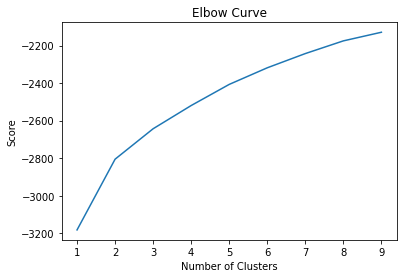

In [32]:
# The right amount of clusters

clust = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in clust]

score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

import matplotlib.pyplot as plt

plt.plot(clust,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [35]:
from sklearn.cluster import MiniBatchKMeans, DBSCAN

# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=0)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

MiniBatchKMeans(random_state=0)

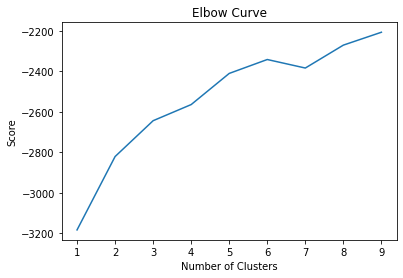

In [36]:
# Define the range of clusters to try
clustno = range(1, 10)

# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]

# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]

# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [38]:
# Run the kmeans model on scaled data
kmeans = KMeans(n_clusters=6, random_state=42).fit(X_scaled)

# Get the cluster number for each datapoint
X_clusters = kmeans.predict(X_scaled)

# Save the cluster centroids
X_clusters_centers = kmeans.cluster_centers_

# Calculate the distance to the cluster centroid for each point
dist = [np.linalg.norm(x-y) for x,y in zip(X_scaled, X_clusters_centers[X_clusters])]

# Create predictions based on distance
km_y_pred = np.array(dist)
km_y_pred[dist>=np.percentile(dist, 93)] = 1
km_y_pred[dist<np.percentile(dist, 93)] = 0

In [39]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=0)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=42).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 95)] = 1
km_y_pred[dist < np.percentile(dist, 95)] = 0

NameError: ignored

# Supervised Model

In [7]:
df_model = df[['Fraud','Device_Type','Application_Duration','Device_Active_Since','Mobile_Provider','Mobile_Number_Active_Since','Email_Domain_Type'
              ,'GPS_di_rumah_kantor','API_Fraud_Vendor_D','API_Fraud_Vendor_C','Device_Apps_Installed'
                  ]]

In [8]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

     |████████████████████████████████| 55 kB 1.1 MB/s 


# Test untuk membuat model Fraud Scorecard tanpa resampling

0    667
1     33
Name: Fraud, dtype: int64
0    283
1     17
Name: Fraud, dtype: int64
[INFO] creating woe binning ...
[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[INFO] converting into woe values ...
Confusion matrix:
 [[281   2]
 [ 15   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       283
           1       0.50      0.12      0.19        17

    accuracy                           0.94       300
   macro avg       0.72      0.56      0.58       300
weighted avg       0.92      0.94      0.93       300



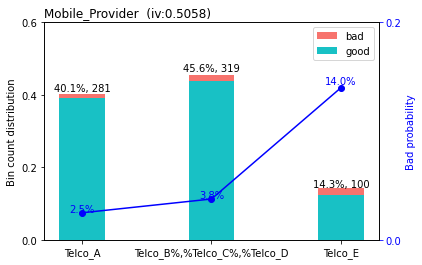

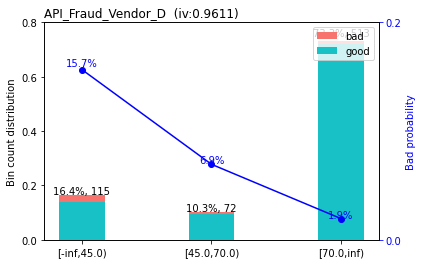

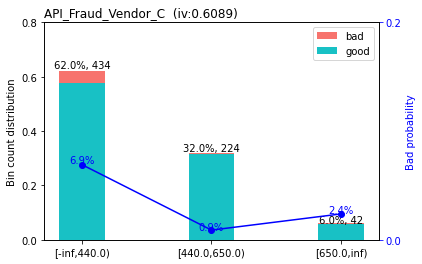

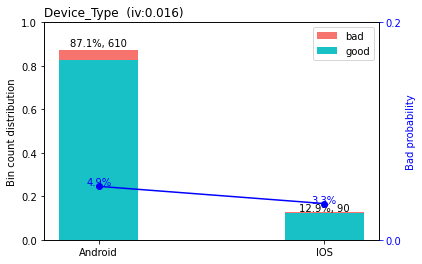

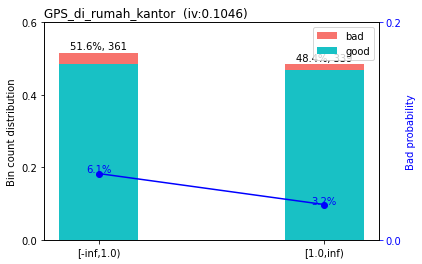

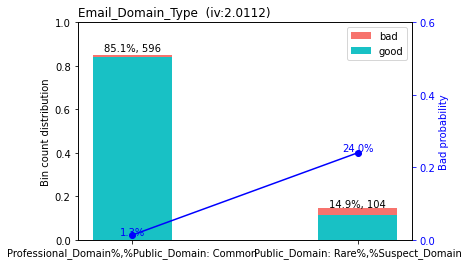

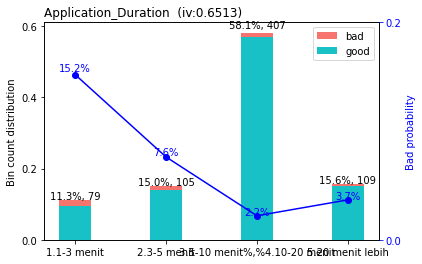

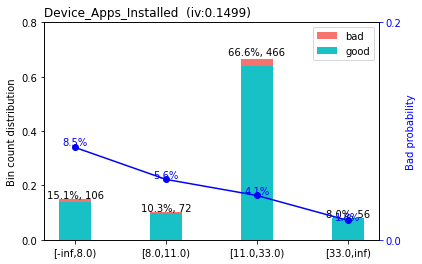

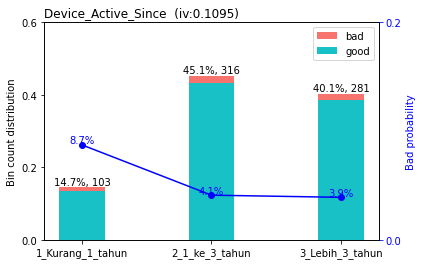

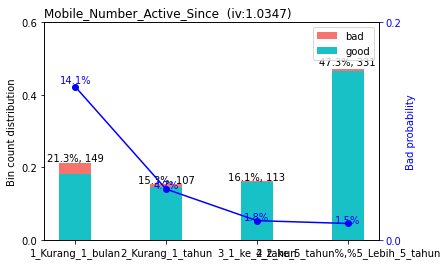

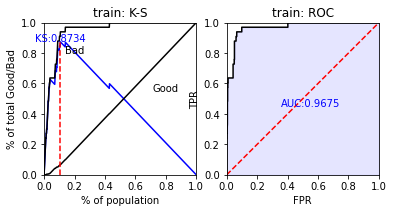

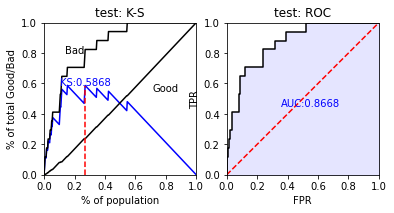

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


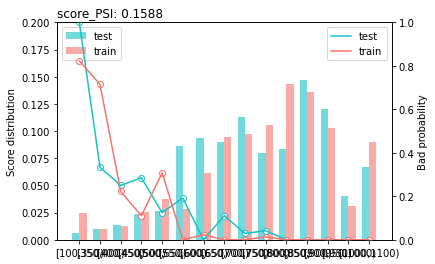

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.158817}

In [9]:
# Membagi dataset menjadi development(train) dan test
y = df_model.loc[:,'Fraud']
X = df_model.loc[:,df_model.columns != 'Fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Untuk melihat frekuensi dari variabel Fraud
print(df_train['Fraud'].value_counts())
print(df_test['Fraud'].value_counts())

# Fraud Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'Fraud')
scpy.woebin_plot(bins)

train = df_train
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'Fraud']
X_train = train_woe.loc[:,train_woe.columns != 'Fraud']
y_test = test_woe.loc[:,'Fraud']
X_test = test_woe.loc[:,train_woe.columns != 'Fraud']

# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

## Evaluasi dengan Confusion Matrix 
# Menggunakan fungsi Confusion Matrix dari sklearn
from sklearn.metrics import confusion_matrix
# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
y_pred=lr.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', matrix)
# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print('Classification report:\n',report)

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Test untuk membuat model Fraud Scorecard dengan resampling

In [10]:
# Membagi dataset menjadi development(train) dan test
y = df_model.loc[:,'Fraud']
X = df_model.loc[:,df_model.columns != 'Fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Metode resampling dengan SMOTENC yang bisa dilakukan untuk variabel angka dan teks
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[X_train.dtypes=='category'], random_state=0)
# oversampling/undersampling hanya dilakukan di data train
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

# Dalam bentuk dataframe lengkap
X_resampled_df = pd.DataFrame(X_resampled, columns=list(X_train.columns))
y_resampled_df = pd.DataFrame(y_resampled, columns=['Fraud'])
df_train_SMOTE = pd.concat([X_resampled_df, y_resampled_df], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train_SMOTE = df_train_SMOTE.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# Untuk melihat frekuensi dari variabel Fraud
print(df_train_SMOTE['Fraud'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel Fraud
print(df_train_SMOTE['Fraud'].value_counts(normalize=True) * 100)

1    667
0    667
Name: Fraud, dtype: int64
1    50.0
0    50.0
Name: Fraud, dtype: float64


In [12]:
# Untuk melihat frekuensi dari variabel Fraud
print(df_test['Fraud'].value_counts())

# Untuk melihat proporsi (dalam persentase) dari variabel Fraud
print(df_test['Fraud'].value_counts(normalize=True) * 100)

0    283
1     17
Name: Fraud, dtype: int64
0    94.333333
1     5.666667
Name: Fraud, dtype: float64


In [13]:
df_train_SMOTE.info()
df_train_SMOTE.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1334 entries, 0 to 1333
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Device_Type                 1334 non-null   category
 1   Application_Duration        1334 non-null   category
 2   Device_Active_Since         1334 non-null   category
 3   Mobile_Provider             1334 non-null   category
 4   Mobile_Number_Active_Since  1334 non-null   category
 5   Email_Domain_Type           1334 non-null   category
 6   GPS_di_rumah_kantor         1334 non-null   int64   
 7   API_Fraud_Vendor_D          1334 non-null   int64   
 8   API_Fraud_Vendor_C          1334 non-null   int64   
 9   Device_Apps_Installed       1334 non-null   int64   
 10  Fraud                       1334 non-null   int64   
dtypes: category(6), int64(5)
memory usage: 61.0 KB


,Device_Type,Application_Duration,Device_Active_Since,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type,GPS_di_rumah_kantor,API_Fraud_Vendor_D,API_Fraud_Vendor_C,Device_Apps_Installed,Fraud
0,IOS,4.10-20 menit,2_1_ke_3_tahun,Telco_E,1_Kurang_1_bulan,Suspect_Domain,0,74,188,29,1
1,Android,5.20 menit lebih,3_Lebih_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1,59,264,27,0
2,Android,3.5-10 menit,2_1_ke_3_tahun,Telco_D,4_2_ke_5_tahun,Professional_Domain,1,36,398,19,0
3,Android,3.5-10 menit,3_Lebih_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1,63,210,13,0
4,Android,4.10-20 menit,2_1_ke_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,0,308,182,36,0
5,Android,1.1-3 menit,2_1_ke_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1,203,136,12,0
6,Android,4.10-20 menit,2_1_ke_3_tahun,Telco_D,3_1_ke_2_tahun,Public_Domain: Common,0,56,564,6,0
7,Android,5.20 menit lebih,3_Lebih_3_tahun,Telco_B,1_Kurang_1_bulan,Public_Domain: Common,0,125,146,24,0
8,Android,4.10-20 menit,3_Lebih_3_tahun,Telco_B,4_2_ke_5_tahun,Public_Domain: Common,0,250,528,36,0
9,Android,5.20 menit lebih,3_Lebih_3_tahun,Telco_D,5_Lebih_5_tahun,Public_Domain: Common,1,127,578,31,0


In [14]:
# SMOTE mengubah semua menjadi object. Maka harus diset variabel ulang
# Merubah tipe data menjadi tipe karakter int64
# Gunakan integer untuk angka bulat
df_train_SMOTE['API_Fraud_Vendor_D'] = df_train_SMOTE.API_Fraud_Vendor_D.astype('int64')
df_train_SMOTE['API_Fraud_Vendor_C'] = df_train_SMOTE.API_Fraud_Vendor_C.astype('int64')
df_train_SMOTE['GPS_di_rumah_kantor'] = df_train_SMOTE.GPS_di_rumah_kantor.astype('int64')
df_train_SMOTE['Device_Apps_Installed'] = df_train_SMOTE.Device_Apps_Installed.astype('int64')
df_train_SMOTE['Fraud'] = df_train_SMOTE.Fraud.astype('int64')

[INFO] creating woe binning ...


{'API_Fraud_Vendor_C': <Figure size 432x288 with 2 Axes>,
 'API_Fraud_Vendor_D': <Figure size 432x288 with 2 Axes>,
 'Application_Duration': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Device_Apps_Installed': <Figure size 432x288 with 2 Axes>,
 'Device_Type': <Figure size 432x288 with 2 Axes>,
 'Email_Domain_Type': <Figure size 432x288 with 2 Axes>,
 'GPS_di_rumah_kantor': <Figure size 432x288 with 2 Axes>,
 'Mobile_Number_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider': <Figure size 432x288 with 2 Axes>}

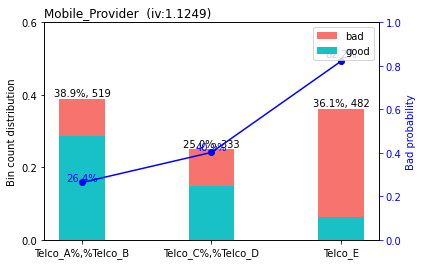

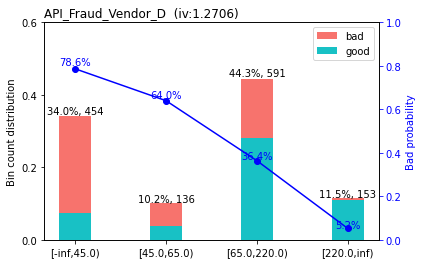

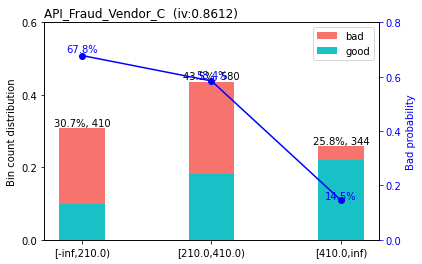

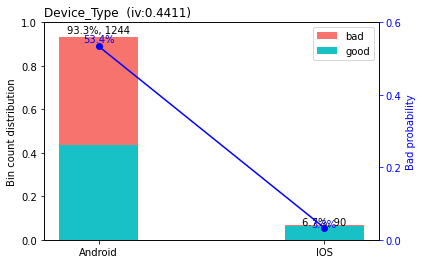

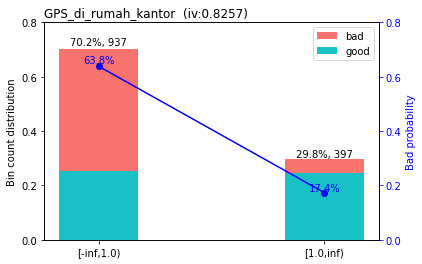

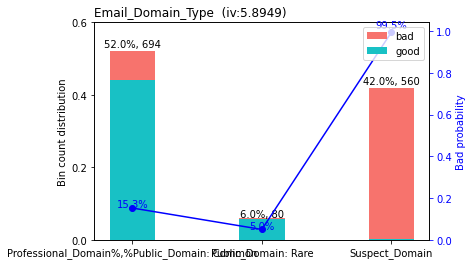

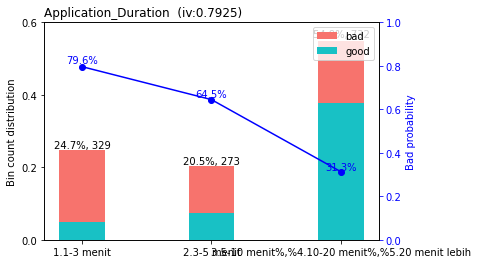

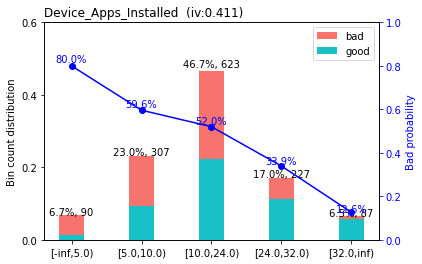

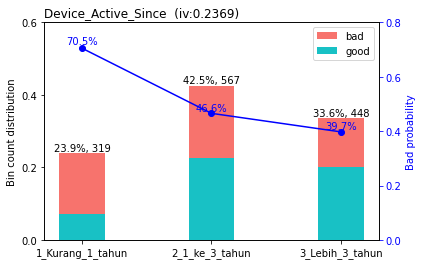

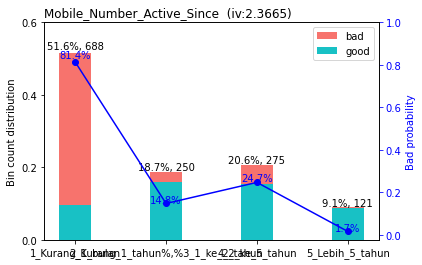

In [15]:
# Fraud Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train_SMOTE, y = 'Fraud')

scpy.woebin_plot(bins)

In [16]:
train_SMOTE = df_train_SMOTE
test = df_test

# converting train and test into woe values
train_woe = scpy.woebin_ply(train_SMOTE, bins)
test_woe = scpy.woebin_ply(test, bins)

y_train = train_woe.loc[:,'Fraud']
X_train = train_woe.loc[:,train_woe.columns != 'Fraud']
y_test = test_woe.loc[:,'Fraud']
X_test = test_woe.loc[:,train_woe.columns != 'Fraud']

print(X_train)
print(y_train)

[INFO] converting into woe values ...


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


[INFO] converting into woe values ...
      Mobile_Provider_woe  ...  Mobile_Number_Active_Since_woe
0                1.527067  ...                        1.475907
1               -1.025440  ...                       -1.750374
2               -0.395465  ...                       -1.113211
3               -1.025440  ...                       -1.750374
4               -1.025440  ...                       -1.750374
...                   ...  ...                             ...
1329            -1.025440  ...                        1.475907
1330             1.527067  ...                        1.475907
1331             1.527067  ...                        1.475907
1332            -0.395465  ...                       -1.113211
1333             1.527067  ...                        1.475907

[1334 rows x 10 columns]
0       1
1       0
2       0
3       0
4       0
       ..
1329    1
1330    1
1331    1
1332    1
1333    1
Name: Fraud, Length: 1334, dtype: int64


In [17]:
# Membuat scorecard dengan menggunakan algoritma logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.coef_)

# For those that want to know the statistic modeling
import numpy as np
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)
result = model.fit()

result.summary()

[[0.32791252 1.05546349 0.83413401 0.5443893  1.28707707 0.8998214
  0.99661532 1.10020906 1.50496248 0.8995735 ]]


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.076647
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Fraud   No. Observations:                 1334
Model:                          Logit   Df Residuals:                     1324
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Nov 2021   Pseudo R-squ.:                  0.8894
Time:                        16:07:08   Log-Likelihood:                -102.25
converged:                       True   LL-Null:                       -924.66
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Mobile_Provider_woe                0.3916      0.180      2.173      0.030       0.038       0.745
API_Fraud_Vendor_D_woe             1.1169      0.181      6.164      0.000       0.762       1.472
API_Fraud_Vendor_C_woe             0.9189      0.227      4.039      0.000       0.473       1.365
Device_Type_woe                    0.6146      0.371      1.657      0.097      -0.112       1.341
GPS_di_rumah_kantor_woe            1.3886      0.252      5.513      0.000       0.895       1.882
Email_Domain_Type_woe              1.0213      0.110      9.297      0.000       0.806       1.237
Application_Duration_woe           1.1077      0.237      4.682      0.000       0.644       1.571
Device_Apps_Installed_woe          1.2003      0.333      3.609      0.000       0.548       1.852
Device_Active_Since_woe            1.6531      0.355      4.653      0.000       0.957       2.349
Mobile_Number_Active_Since_woe     0.9229      0.127      7.244      0.000       0.673       1.173
==================================================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Confusion matrix:
 [[274   9]
 [  8   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       283
           1       0.50      0.53      0.51        17

    accuracy                           0.94       300
   macro avg       0.74      0.75      0.74       300
weighted avg       0.94      0.94      0.94       300



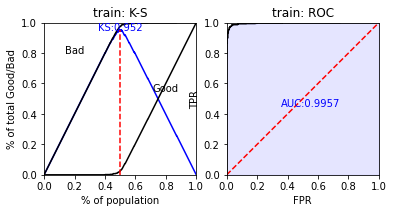

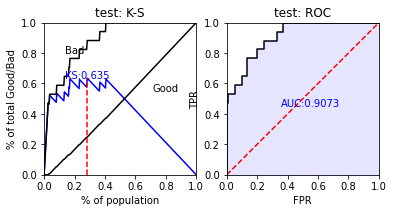

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


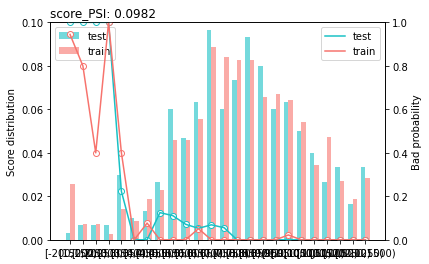

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.098214}

In [18]:
# predicted probability
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

## Evaluasi dengan Confusion Matrix 
# Menggunakan fungsi Confusion Matrix dari sklearn
from sklearn.metrics import confusion_matrix
# Kita akan cek hasil confusion matrix antara hasil sebenarnya dengan prediksi dari model ke data test
y_pred=lr.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', matrix)
# Menggunakan fungsi Classification Report dari sklearn
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print('Classification report:\n',report)

# performance ks & roc ------
train_perf = scpy.perf_eva(y_train, train_pred, title = "train")
test_perf = scpy.perf_eva(y_test, test_pred, title = "test")

# score ------
card = scpy.scorecard(bins, lr, X_train.columns, points0=600, odds0=1/20, pdo=50, basepoints_eq0=False)
# credit score
train_score = scpy.scorecard_ply(train, card, print_step=0)
test_score = scpy.scorecard_ply(test, card, print_step=0)

# psi
scpy.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

# Persiapan Dummy Variabels untuk Model tanpa scorecardpy

In [19]:
# Memisahkan variabel kategori dengan variabel numerik
dataset_dummies = df_model.select_dtypes(exclude = ['float64','int64','int'])
dataset_int = df_model.select_dtypes(include=['float64','int64','int'])

# Memisahkan target/dependent variabel dari dataset dengan variabel kategori
target = df_model['Fraud']
dataset_int.drop(['Fraud'], axis = 1, inplace = True)

# Menggunakan function get_dummies dari panda untuk melakukan one hot encoding
dataset_dummies_df = pd.get_dummies(dataset_dummies,drop_first = True)
    
# Menggabungkan dataset variabel kategori dari one hot encoding dengan variabel numerik
dataset = pd.concat([dataset_dummies_df, dataset_int], axis = 1)
feature_name = dataset.columns
df_encoded = pd.concat([dataset, target], axis = 1)

# Cek isi df_encoded
print(df_encoded.head(10))
df_encoded.info()

   Device_Type_IOS  ...  Fraud
0                0  ...      0
1                1  ...      0
2                0  ...      0
3                0  ...      0
4                0  ...      0
5                0  ...      0
6                0  ...      0
7                0  ...      0
8                1  ...      0
9                0  ...      0

[10 rows x 23 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   Device_Type_IOS                              1000 non-null   uint8
 1   Application_Duration_2.3-5 menit             1000 non-null   uint8
 2   Application_Duration_3.5-10 menit            1000 non-null   uint8
 3   Application_Duration_4.10-20 menit           1000 non-null   uint8
 4   Application_Duration_5.20 menit lebih        1000 non-null   uint8
 5   Device_Active_Since_

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Masih menggunakan Logistic Regression
*   Menggunakan parameter optimisasi di Logistic (solver liblinear)
*   Melakukan resampling dengan SMOTE

In [20]:
# Define which resampling method and which ML model to use in the pipeline
# resampling = SMOTE(kind='borderline2')  # has been changed to BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'Fraud']
X = df_encoded.loc[:,df_encoded.columns != 'Fraud']

# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       283
           1       0.45      0.29      0.36        17

    accuracy                           0.94       300
   macro avg       0.71      0.64      0.66       300
weighted avg       0.93      0.94      0.93       300

Confusion matrix:
 [[277   6]
 [ 12   5]]


# Menggunakan model Random Forest
*   Menggunakan opsi parameter standar di Random Forest
*   Tidak melakukan resampling

In [21]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'Fraud']
X = df_encoded.loc[:,df_encoded.columns != 'Fraud']

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=20)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       283
           1       1.00      0.06      0.11        17

    accuracy                           0.95       300
   macro avg       0.97      0.53      0.54       300
weighted avg       0.95      0.95      0.92       300

Confusion matrix:
 [[283   0]
 [ 16   1]]
ROC Score: 0.7053627104552068


# Menggunakan model Random Forest
*   Menggunakan opsi parameter standar di Random Forest
*   Tidak melakukan resampling, tapi meakukan class_weight

In [22]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'Fraud']
X = df_encoded.loc[:,df_encoded.columns != 'Fraud']

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=42, n_estimators=100)

# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

# Obtain model probabilities
probs = model.predict_proba(X_test)

# Print ROC_AUC score using probabilities
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
print('ROC Score:', roc_auc_score(y_test, probs[:, 1]))

Classifcation report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       283
           1       1.00      0.06      0.11        17

    accuracy                           0.95       300
   macro avg       0.97      0.53      0.54       300
weighted avg       0.95      0.95      0.92       300

Confusion matrix:
 [[283   0]
 [ 16   1]]
ROC Score: 0.8446268966950738


# Menggunakan model Random Forest
*   Optimilisasi parameter di Random Forest
*   Tidak melakukan resampling, tapi melakukan class_weight 

In [23]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'Fraud']
X = df_encoded.loc[:,df_encoded.columns != 'Fraud']

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model as the random forest
from sklearn.ensemble import RandomForestClassifier
# Change the model options
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12},
                               criterion='entropy',
                               # Change depth of model
                               max_depth=10,
                               # Change the number of samples in leaf nodes
                               min_samples_leaf=10, 
                               # Change the number of trees to use
                               n_estimators=20,
                               n_jobs=-1,
                               random_state=42)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.8582415298274787

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       283
           1       0.33      0.12      0.17        17

    accuracy                           0.94       300
   macro avg       0.64      0.55      0.57       300
weighted avg       0.91      0.94      0.92       300


Confusion Matrix:
[[279   4]
 [ 15   2]]


# Menggunakan model Random Forest
*   Optimisasi parameter dengan GridSearchCV
*   Tidak melakukan resampling 

In [24]:
# Membagi dataset menjadi development(train) dan test
y = df_encoded.loc[:,'Fraud']
X = df_encoded.loc[:,df_encoded.columns != 'Fraud']

# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30],
              'max_features': ['auto', 'log2'], 
              'max_depth': [4, 8, 10, 12],
              'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(random_state=42)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

NameError: ignored

In [ ]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12},
                               criterion='gini',
                               max_depth=8,
                               max_features='auto', 
                               min_samples_leaf=10,
                               n_estimators=30,
                               n_jobs=-1,
                               random_state=42)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

# Menggunakan Voting Classifer
*   Menggabungkan hasil berbagai macam model



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15},
                          random_state=42,
                          solver='liblinear')

clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=42)

clf3 = DecisionTreeClassifier(random_state=42,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

In [ ]:
# Masih menggunakan Logistic Regression
# Mengoptimalkan parameter input dalam membuat model
# Melakukan skala / scaling dari variabel input
from sklearn.model_selection import GridSearchCV

# Menggunakan scaling dengan standard scaler dari library sklearn
from sklearn.preprocessing import StandardScaler

# Memanggil fungsi standard scaler
sc = StandardScaler()

# Merubah nilai X dari Train dan Test menjadi standardisation
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

# Set values of the grid search
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_grid = {'C': C_values}
# Set the amount of folds for the cross-validation
n_folds = 20
# Do a model fit over a grid of C hyperparameters
logReg = LogisticRegression(penalty='l2', random_state=7)
grid_logReg = GridSearchCV(logReg, C_grid, cv=n_folds, refit=True)
grid_logReg.fit(X_train_scale, y_train)

# Predict based on the model
y_pred=grid_logReg.predict(X_test_scale)

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

In [ ]:
# Menggunakan model Random Forest standar
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)

In [ ]:
# Menggunakan model Random Forest dengan 
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state = 42)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Classification report
report = classification_report(y_test, y_pred)
# cek hasil matrix
print(report)